In [1011]:
import numpy as np
import pandas as pd

In [1012]:
X_train = pd.read_csv('train.csv')

In [1013]:
X_train.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


In [1014]:
y_train = X_train['DEFCON_Level']

In [1015]:
X_train.shape

(10000, 12)

In [1016]:
X_test = pd.read_csv('test.csv')

In [1017]:
X_test.shape

(2500, 11)

In [1018]:
X_test.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID
0,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0,1
1,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0,10
2,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0,14
3,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0,17
4,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0,21


In [1019]:
X_train = X_train.drop(['ID', 'DEFCON_Level'], axis=1)

In [1010]:
from sklearn import preprocessing

x = X_train.values
min_max_scaler = preprocessing.Normalizer()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled, columns=X_train.columns)

In [1020]:
X_train.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0


In [1021]:
ids = X_test['ID']

In [1022]:
X_test = X_test.drop('ID', axis=1)

In [687]:
X_train['Total_Threats'] = (X_train['Active_Threats'] + X_train['Inactive_Threats']).values
X_train['Threat_Percent'] = (X_train['Active_Threats'] / X_train['Total_Threats']).values

X_test['Total_Threats'] = (X_test['Active_Threats'] + X_test['Inactive_Threats']).values
X_test['Threat_Percent'] = (X_test['Active_Threats'] / X_test['Total_Threats']).values

In [ ]:
X_train = X_train.drop('Active_Threats', axis=1)
X_test = X_test.drop('Active_Threats', axis=1)

X_train = X_train.drop('Inactive_Threats', axis=1)
X_test = X_test.drop('Inactive_Threats', axis=1)

In [772]:
X_train.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0


In [585]:
x = X_test.values
min_max_scaler = preprocessing.Normalizer()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled, columns=X_test.columns)

#scaler = preprocessing.StandardScaler()
#scaler.fit(X_train)

# Apply transform to both the training set and the test set.
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [1023]:
from sklearn.model_selection import GridSearchCV

In [50]:
from sklearn.ensemble import RandomForestClassifier

'''
param_grid = { 
    'n_estimators': [10, 20, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf': [9, 10, 11, 12],
    'min_samples_split': [9, 10, 11, 12]
}
'''

param_grid = { 
    'n_estimators': [170],
    'max_features': ['auto'],
    'max_depth' : [17],
    'criterion' :['entropy'],
    'min_samples_leaf': [7],
    'min_samples_split': [7]
}

classifier = RandomForestClassifier(random_state = 42)

CV_rfc = GridSearchCV(estimator=classifier,
                      param_grid=param_grid,
                      cv = 10,
                      n_jobs = -1,
                      verbose = 2)

CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [51]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 170}
0.6368


In [57]:
classifier = RandomForestClassifier(random_state = 42,
                                    max_features = 'auto',
                                    n_estimators = 170,
                                    max_depth = 17,
                                    min_samples_leaf = 7,
                                    min_samples_split = 7,
                                    criterion = 'entropy')

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=170,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [44]:
classifier.feature_importances_

array([0.04307164, 0.04121716, 0.12437399, 0.01653045, 0.09750076,
       0.14195364, 0.13821954, 0.10084389, 0.01930877, 0.27698017])

In [1024]:
from xgboost import XGBClassifier

In [72]:
parameters = {
    "learning_rate": [0.01],
    "min_samples_split": [2],
    "min_samples_leaf": [2],
    "max_depth": [17],
    "max_features": ["log2"],
    "min_child_weight": [6],
    "gamma": [0.5],
    "criterion": ["friedman_mse"],
    "n_estimators": [170],
    "warm_start": [True]
    }

classifier = GridSearchCV(XGBClassifier(random_state=97), parameters, cv=10, n_jobs=-1, verbose=2)

classifier.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   20.6s remaining:   20.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=97, reg_alpha=0, reg_lambda=1,
                                     scale_...
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'], 'gamma': [0.5],
                         'learning_rate': [0.01], 'max_depth': [17],
                         'max_features': ['log2'], 'min_child_weight':

In [73]:
print(classifier.best_params_)
print(classifier.best_score_)

{'criterion': 'friedman_mse', 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 17, 'max_features': 'log2', 'min_child_weight': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 170, 'warm_start': True}
0.631


In [831]:
correlated_features = set()
correlation_matrix = X_train.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        print("{0} vs {1} - corr: {2}".format(correlation_matrix.columns[i],
                                              correlation_matrix.columns[j],
                                              abs(correlation_matrix.iloc[i, j])))
        
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

Diplomatic_Meetings_Set vs Allied_Nations - corr: 0.27877863099499894
Percent_Of_Forces_Mobilized vs Allied_Nations - corr: 0.6503081374972499
Percent_Of_Forces_Mobilized vs Diplomatic_Meetings_Set - corr: 0.5761155255649838
Hostile_Nations vs Allied_Nations - corr: 0.11189618077462829
Hostile_Nations vs Diplomatic_Meetings_Set - corr: 0.03666177822031956
Hostile_Nations vs Percent_Of_Forces_Mobilized - corr: 0.14931669382375967
Active_Threats vs Allied_Nations - corr: 0.11360946929376282
Active_Threats vs Diplomatic_Meetings_Set - corr: 0.01904588513942546
Active_Threats vs Percent_Of_Forces_Mobilized - corr: 0.0366747744119645
Active_Threats vs Hostile_Nations - corr: 0.1467728985291254
Inactive_Threats vs Allied_Nations - corr: 0.06749585189845306
Inactive_Threats vs Diplomatic_Meetings_Set - corr: 0.08900679509333226
Inactive_Threats vs Percent_Of_Forces_Mobilized - corr: 0.05447365279741348
Inactive_Threats vs Hostile_Nations - corr: 0.2202518828668336
Inactive_Threats vs Active_T

In [828]:
correlated_features

set()

In [833]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [835]:
classifier = XGBClassifier(random_state = 97)

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='binary:logistic',
                              random_state=97, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [836]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 9


In [837]:
%matplotlib inline

import matplotlib.pyplot as plt

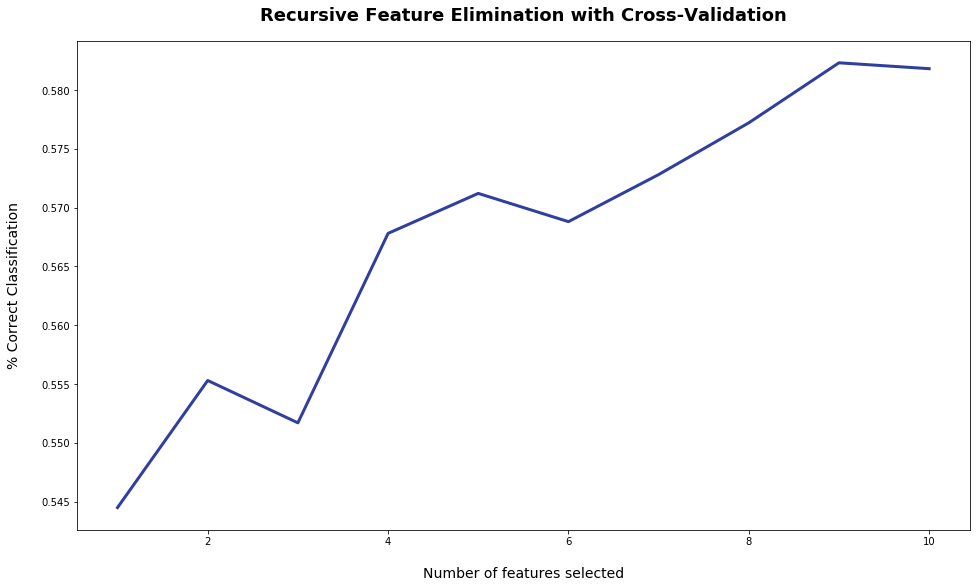

In [838]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [883]:
print(np.where(rfecv.support_ == False)[0])

[3]


In [841]:
print(rfecv.estimator_.feature_importances_)

[0.07399655 0.12426087 0.08906123 0.05148506 0.10196422 0.05450731
 0.0573174  0.12980984 0.31759748]


In [884]:
X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

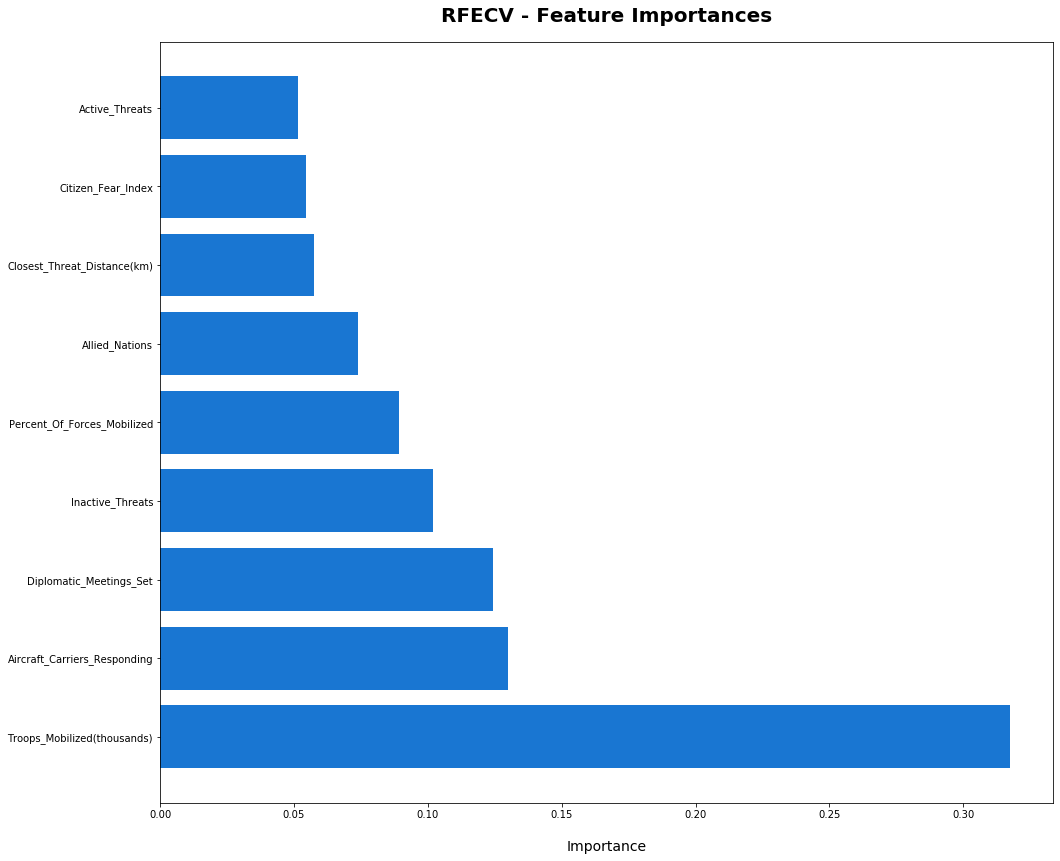

In [843]:
dset = pd.DataFrame()
dset['attr'] = X_train.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [1025]:
classifier = XGBClassifier(random_state = 97,
                           learning_rate = 0.01,
                           max_features = 'auto',
                           n_estimators = 182,
                           max_depth = 10,
                           gamma = 1,
                           reg_lambda = 0.89,
                           min_child_weight = 3,
                           objective = "multi:softmax",
                           nthread = 4,
                           subsample = 0.9,
                           reg_alpha = 0.011,
                           max_delta_step = 1,
                           n_jobs = -1,
                           verbose = 2)

classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=1, max_depth=10,
              max_features='auto', min_child_weight=3, missing=None,
              n_estimators=182, n_jobs=-1, nthread=4,
              objective='multi:softprob', random_state=97, reg_alpha=0.011,
              reg_lambda=0.89, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, verbose=2, verbosity=1)

In [1026]:
predictions = classifier.predict(X_test)

In [1027]:
predictions

array([4, 3, 2, ..., 2, 4, 2], dtype=int64)

In [1028]:
'''
for i in range(10):
    X_train = pd.concat([X_train , X_test])
    y_train = pd.concat([y_train, pd.Series(predictions)])

    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
predictions
'''

'\nfor i in range(10):\n    X_train = pd.concat([X_train , X_test])\n    y_train = pd.concat([y_train, pd.Series(predictions)])\n\n    classifier.fit(X_train, y_train)\n    predictions = classifier.predict(X_test)\n    \npredictions\n'

In [1029]:
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{1: 62, 2: 1193, 3: 1030, 4: 211, 5: 4}

In [1030]:
results=pd.DataFrame({"ID":ids, "DEFCON_Level":predictions.ravel()})
results.to_csv("results.csv", index=False)

In [1031]:
classifier.feature_importances_

array([0.08346295, 0.13515995, 0.08260988, 0.06130967, 0.06947494,
       0.08807786, 0.0669209 , 0.06727917, 0.12873353, 0.2169711 ],
      dtype=float32)

In [1032]:
np.argsort(classifier.feature_importances_)

array([3, 6, 7, 4, 2, 0, 5, 8, 1, 9], dtype=int64)

In [697]:
#from sklearn.linear_model import LogisticRegression
# {1: 62, 2: 1198, 3: 1024, 4: 212, 5: 4}

'''
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=1, max_depth=10,
              max_features='auto', min_child_weight=3, missing=None,
              n_estimators=182, n_jobs=-1, nthread=4,
              objective='multi:softprob', random_state=97, reg_alpha=0.011,
              reg_lambda=0.89, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, verbose=2, verbosity=1)
'''

Out[582]

{1: 62, 2: 1198, 3: 1024, 4: 212, 5: 4}

In [ ]:
#lreg = LogisticRegression(max_iter=10000, C=1, penalty="l1", solver="saga", verbose=2)

#lreg.fit(X_train, y_train)

In [ ]:
predictions = lreg.predict(X_test)

In [17]:
from catboost import CatBoostClassifier

columns = list(X_train.columns)
cat_features = np.where(X_train[columns].dtypes != np.float)[0]

In [17]:
#cbc = CatBoostClassifier(iterations=500, depth=5, leaf_estimation_iterations=10)
#cbc.fit(X_train, y_train, cat_features=cat_features)#, logging_level='Silent')
#print(cbc.score(X_train, y_train))

In [18]:
'''
parameters = {
    "learning_rate": [0.01],
    "max_depth": [7, 10],
    "n_estimators": [200, 230, 250],
    "bagging_temperature": [10],
    "colsample_bylevel": [0.6]
    }

clf = GridSearchCV(CatBoostClassifier(random_seed=97), parameters, cv=10, n_jobs=-1, verbose=True)

clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
'''

'\nparameters = {\n    "learning_rate": [0.01],\n    "max_depth": [7, 10],\n    "n_estimators": [200, 230, 250],\n    "bagging_temperature": [10],\n    "colsample_bylevel": [0.6]\n    }\n\nclf = GridSearchCV(CatBoostClassifier(random_seed=97), parameters, cv=10, n_jobs=-1, verbose=True)\n\nclf.fit(X_train, y_train)\nprint(clf.best_params_)\nprint(clf.best_score_)\n'

In [19]:
'''
classifier = CatBoostClassifier(random_seed=97,
                                n_estimators=1000,
                                loss_function='Logloss',
                                colsample_bylevel=0.8,
                                max_depth=6,
                                learning_rate=0.01,
                                bagging_temperature=10)

classifier.fit(X_train, y_train)
'''

"\nclassifier = CatBoostClassifier(random_seed=97,\n                                n_estimators=1000,\n                                loss_function='Logloss',\n                                colsample_bylevel=0.8,\n                                max_depth=6,\n                                learning_rate=0.01,\n                                bagging_temperature=10)\n\nclassifier.fit(X_train, y_train)\n"

In [23]:
params = {'depth':[7],
          'iterations':[170],
          'learning_rate':[0.3], 
          'l2_leaf_reg':[10],
          'border_count':[100],
          'thread_count':[4]}

clf = GridSearchCV(CatBoostClassifier(random_seed=97), params, cv=10, n_jobs=-1, verbose=2)

clf.fit(X_train, y_train, cat_features=cat_features)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   40.1s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   49.1s finished


0:	learn: 1.3373693	total: 28.7ms	remaining: 4.86s
1:	learn: 1.2108338	total: 49ms	remaining: 4.12s
2:	learn: 1.1345724	total: 67.7ms	remaining: 3.77s
3:	learn: 1.0846587	total: 89.6ms	remaining: 3.72s
4:	learn: 1.0503591	total: 110ms	remaining: 3.62s
5:	learn: 1.0296855	total: 116ms	remaining: 3.18s
6:	learn: 1.0105958	total: 136ms	remaining: 3.15s
7:	learn: 0.9924019	total: 154ms	remaining: 3.12s
8:	learn: 0.9869726	total: 159ms	remaining: 2.84s
9:	learn: 0.9769694	total: 179ms	remaining: 2.86s
10:	learn: 0.9682671	total: 197ms	remaining: 2.85s
11:	learn: 0.9623189	total: 218ms	remaining: 2.87s
12:	learn: 0.9545210	total: 237ms	remaining: 2.86s
13:	learn: 0.9488562	total: 257ms	remaining: 2.87s
14:	learn: 0.9441855	total: 278ms	remaining: 2.88s
15:	learn: 0.9402351	total: 300ms	remaining: 2.89s
16:	learn: 0.9379826	total: 308ms	remaining: 2.77s
17:	learn: 0.9328470	total: 328ms	remaining: 2.77s
18:	learn: 0.9322370	total: 345ms	remaining: 2.74s
19:	learn: 0.9287251	total: 364ms	remai

169:	learn: 0.6926080	total: 3.46s	remaining: 0us
{'border_count': 100, 'depth': 7, 'iterations': 170, 'l2_leaf_reg': 10, 'learning_rate': 0.3, 'thread_count': 4}
0.603


In [34]:
classifier = CatBoostClassifier(random_seed = 97,
                                iterations = 170,
                                loss_function = 'MultiClass',
                                depth = 6,
                                learning_rate = 0.3,
                                l2_leaf_reg = 10,
                                border_count = 100,
                                thread_count = 4)

classifier.fit(X_train, y_train, cat_features=cat_features)

0:	learn: 1.3315898	total: 20.7ms	remaining: 3.5s
1:	learn: 1.2130553	total: 41.3ms	remaining: 3.47s
2:	learn: 1.1390238	total: 65ms	remaining: 3.62s
3:	learn: 1.0896347	total: 80.4ms	remaining: 3.34s
4:	learn: 1.0557338	total: 101ms	remaining: 3.34s
5:	learn: 1.0353078	total: 110ms	remaining: 3.01s
6:	learn: 1.0159354	total: 130ms	remaining: 3.03s
7:	learn: 1.0061995	total: 140ms	remaining: 2.84s
8:	learn: 0.9896456	total: 160ms	remaining: 2.86s
9:	learn: 0.9786454	total: 176ms	remaining: 2.82s
10:	learn: 0.9692133	total: 195ms	remaining: 2.82s
11:	learn: 0.9620898	total: 212ms	remaining: 2.79s
12:	learn: 0.9563067	total: 235ms	remaining: 2.83s
13:	learn: 0.9534306	total: 252ms	remaining: 2.8s
14:	learn: 0.9510743	total: 273ms	remaining: 2.82s
15:	learn: 0.9503007	total: 290ms	remaining: 2.79s
16:	learn: 0.9481498	total: 310ms	remaining: 2.79s
17:	learn: 0.9460197	total: 326ms	remaining: 2.75s
18:	learn: 0.9442790	total: 346ms	remaining: 2.75s
19:	learn: 0.9425619	total: 362ms	remaini

162:	learn: 0.7549694	total: 3s	remaining: 129ms
163:	learn: 0.7536399	total: 3.03s	remaining: 111ms
164:	learn: 0.7523397	total: 3.04s	remaining: 92.2ms
165:	learn: 0.7515459	total: 3.06s	remaining: 73.8ms
166:	learn: 0.7510785	total: 3.08s	remaining: 55.3ms
167:	learn: 0.7506238	total: 3.1s	remaining: 36.9ms
168:	learn: 0.7499483	total: 3.12s	remaining: 18.4ms
169:	learn: 0.7484567	total: 3.13s	remaining: 0us
